(fouriertrans)=
# NB. Fourier Transform

> Saleh Rezaeiravesh and Philipp Schlatter <br />
  salehr@kth.se, pschlatt@mech.kth.se <br />
  SimEx/FLOW, KTH Engineering Mechanics, Royal Institute of Technology, Stockholm, Sweden

> This notebook is a part of the [KTH-Nek5000 lecture notes](https://kth-nek5000.github.io/kthNekBook/).

In [2]:
import numpy as np
from math import pi
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 15,
          'legend.loc':'best',
          'figure.figsize': (14,5),
          'lines.markerfacecolor':'none',
         'axes.labelsize': 17,
         'axes.titlesize': 17,
         'xtick.labelsize':15,
         'ytick.labelsize':15,
         'grid.alpha':0.6}
pylab.rcParams.update(params)
#%matplotlib notebook
%matplotlib inline

## Fourier Series and Fourier Transform

### Fourier Series
If a function $f(x)$ is 
* periodic with period $L$, and
* satisfies the **Dirichlet condition** over one period, *i.e.* is bounded and has a finite number of local optima and a finite number of discontinuities, 
then it can be represented by an infinite **Fourier series**, see e.g. Chapter 6 in [Wylie](https://archive.org/details/in.ernet.dli.2015.350312/mode/2up).

$$
f(x) = \sum_{k=-\infty}^{\infty} c_k \Phi_k(x) \,,
$$

where the Fourier bases are $\Phi_k(x)=e^{i\alpha k x}$, $i=\sqrt{-1}$, and $\alpha:=2\pi/L$. The coefficients in the series are obtained from,

$$
c_k=\frac{1}{L}\int_{x_0}^{x_0+L} f(x) \Phi_{-k}(x) {\rm d}x \,,
$$

where $\Phi_{-k}(x)=e^{-i\alpha k x}$. Using the definition, 

$$
\Phi_{\pm k}(x)=\cos\alpha k x \pm i \sin \alpha kx \,,
$$


the Fourier series can be alternatively written as, 

$$
f(x) = \frac{1}{2}a_0 + \sum_{k=1}^\infty \left( a_k \cos(\frac{2k\pi x}{L}) + b_k \sin(\frac{2k\pi x}{L})\right) \,,
$$

where, 
$$
a_0 = \frac{2}{L} \int_{x_0}^{x_0+L} f(x) dx
$$

$$
a_k = \frac{2}{L} \int_{x_0}^{x_0+L} f(x) \cos(\frac{2k\pi x}{L}) dx = \langle f(x),Re(\exp(2k\pi x/L)) \rangle
$$

$$
b_k = \frac{2}{L} \int_{x_0}^{x_0+L} f(x) \sin(\frac{2k\pi x}{L}) dx = \langle f(x),Im(\exp(2k\pi x/L)) \rangle
$$

* The operator $\langle \cdot ,\cdot \rangle$ specifies an inner-product. 
* The Fourier series of function $f$ converges to $f(x)$ for all $x$ at which $f(x)$ is continuous.

### Fourier Transform
For a general (not necessarily periodic) function $f(x)$,
  1. which satisfies the Dirichlet condition on any finite interval, and,
  2. for which $\int_{-\infty}^\infty |f(x)| {\rm d}x$ exists, 
  
the forward and inverse Fourier transforms are defined as,

$$
\hat{f}(k) = \frac{1}{2\pi} \int_{-\infty}^\infty f(x) \Phi_{-k} (x) {\rm d}x \,,\quad 
f(x) = \int_{-\infty}^\infty \hat{f}(k) \Phi_{k} (x) {\rm d}k \,.
$$


## Fourier Bases
The following script plots the Fourier bases:

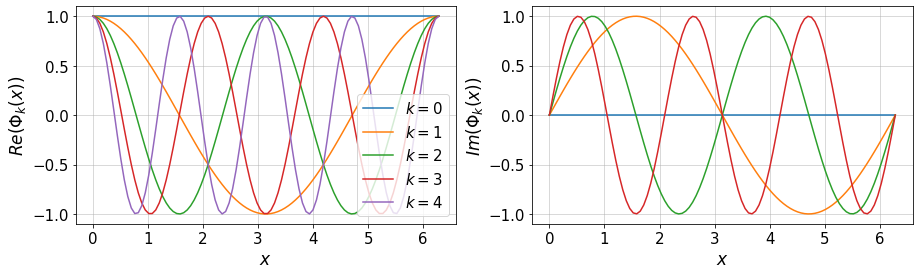

In [3]:
#---- Settings
L=2.*pi   
nModes=5   # Number of modes in the Fourier Transform
#-------------
x=np.linspace(0,L,100)[:,None]
k=np.arange(nModes)[:,None]
xk_=np.dot(x,k.T)
phi_re=np.cos(2.*pi/L*xk_)
phi_im=np.sin(2.*pi/L*xk_)

#plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
for i in range(nModes):   #subrange of k
    plt.plot(x,phi_re[:,i],'-',label=r'$k=$'+str(i))
plt.xlabel(r'$x$')
plt.ylabel(r'$Re(\Phi_k(x))$')
plt.legend(loc='lower right')
plt.grid()
plt.subplot(1,2,2)
plt.plot(x,phi_im[:,0:nModes-1],'-')
plt.xlabel(r'$x$')
plt.ylabel(r'$Im(\Phi_k(x))$')
plt.grid()

## Discrete Fourier Transform
The above definitions for Fourier transform were given in the **continuous** settings. A **discrete** Fourier transform can be considered for the discrete function values $f_j=f(x_j)$. 


$$
\hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-i k  x_j} \,,\quad k=-K,\cdots,K \,,
$$

$$
f_j = \sum_{k=-K}^{K} \hat{f}_k e^{i j x_k} \,,\quad j=0,1,\cdots,N-1
$$

where $x_j=\frac{2\pi j}{N}$ and $2K+1=N$.

Given discrete values of $\{f(x_j)\}_{j=0}^{N-1}$, the following two methods can be used to compute the Fourier coefficients $\hat{f}_k$. Using these and performing Fourier-inverse transform, an (approximate) $f(x)$ can be reconstructed. 



### Projection Method
This is basically numerical integration to evaluate Fourier coefficients from the definition.
The following `Python` function applies the trapezoidal rule to approximate the integrals. Note that due to the presumed periodicity, we do not use 1/2 in trapezoidal rule. 

In [4]:
#Projection Method
def FourierApprox_proj(x,f,L,xTest,fExact):
    """
    DFT and DFT-inv, projection method
    """    
    n=len(x)    
    dx=x[1]-x[0]
    xj=2*pi*x/L
    
    #DFT    
    fHat=[]
    for k in range(n):
        fHat.append(np.sum(f*np.exp(-1j*k*xj))*dx/L)
    fHat=np.asarray(fHat)    
    
    #DFT-inv on xTest   
    K=int(n/2)       
    nTest=len(xTest)
    fFourier=np.zeros(nTest) 
    xTestj=2.*pi*np.arange(nTest)/nTest   
    xTestj*=(x[-1]-x[0])/(xTest[-1]-xTest[0])
    
    k=np.concatenate([np.arange(-K,0),[0],np.arange(1,K)])   
    for k_ in k:
        fFourier+=(fHat[k_]*np.exp(1j*k_*xTestj)).real        
    #error between the true and interpolated f(x)        
    err=norm((fExact-fFourier),np.inf)/norm(fExact,np.inf)      #L_\infty norm     
    #err=norm((fExact-fFourier))/norm(fExact)      #L_2 norm    
    return fHat,err,fFourier  

### Collocation Method
To compute the Fourier coefficients $\{\hat{f}_k\}_{k=0}^{N-1}$ using the collocation method, we only need to numerically evaluate a matrix-vector product:

$$
\hat{\mathbf{F}} = \mathbf{M} \mathbf{F} \,,
$$

where, $\hat{\mathbf{F}}=[\hat{f}_0,\hat{f}_1,\cdots,\hat{f}_{N-1}]^T$, ${\mathbf{F}}=[{f}_0,{f}_1,\cdots,{f}_{N-1}]^T$, and the **Fourier matrix** is, 

$$
\mathbf{M}=
\begin{bmatrix}
1 & 1 & \ldots & 1 \\
 1  & e^{-i x_1} & \ldots & e^{-i x_{N-1}} \\
 \vdots& \vdots \cdots & \vdots \\ 
1  & e^{-i (N-1)x_1} & \ldots & e^{-i (N-1) x_{N-1}} 
\end{bmatrix} \,,
$$


where $\mathbf{M}$ is a $N\times N$ symmetric matrix. 

In [5]:
#Collocation Method
def FourMat(n):
    """ Fourier Matrix """    
    W=np.exp(-1j*2*pi/n)
    I,J=np.meshgrid(np.arange(n),np.arange(n))
    return (W**(I*J))
    ##another implementation:
    #M=np.ones(n)
    #for k in range(1,n):
    #    M=np.vstack((M,np.exp(-1j*k*xj))) 

def FourierApprox_coll(x,f,xTest,fExact):
    """
    DFT and DFT-inv, collocation method
    """   
    n=len(x)               
    xj=2.*pi*np.arange(n)/n
    
    #DFT
    M=FourMat(n)      
    fHat=np.dot(M,f)/n    
    
    #DFT-inv on xTest   
    K=int((n)/2)       
    nTest=len(xTest)
    fFourier=np.zeros(nTest) 
    xTestj=2.*pi*np.arange(nTest)/nTest
    xTestj*=(x[-1]-x[0])/(xTest[-1]-xTest[0])   

    k=np.concatenate([np.arange(-K,0),[0],np.arange(1,K)])  
    for k_ in k:
        fFourier+=(fHat[k_]*np.exp(1j*k_*xTestj)).real               
    #error between the true and interpolated f(x)        
    err=norm((fExact-fFourier),np.inf)/norm(fExact,np.inf)      #L_\infty norm     
    #err=norm((fExact-fFourier))/norm(fExact)      #L_2 norm  
    return fHat,err,fFourier 

### Structure of the Fourier matrix
We can look at the structure of Fourier matrix for a given set of data $\{f(x_i)\}_{i=1}^n$. 

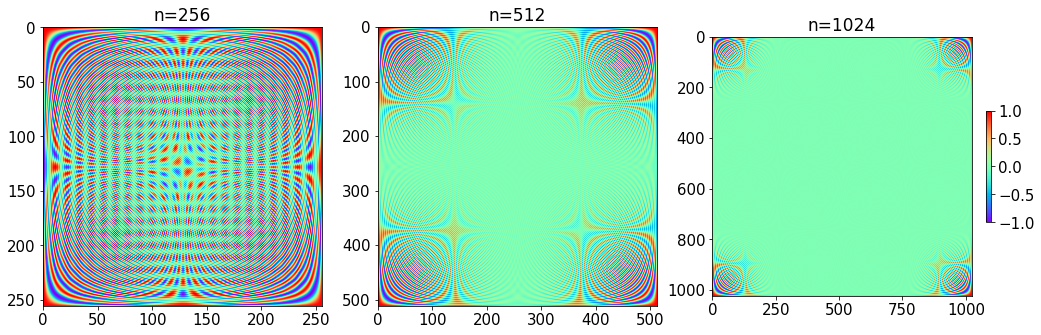

In [6]:
nList=[2**8,2**9,2**10]
fig=plt.figure(figsize=(17,10))
for i in range(len(nList)):
    M=FourMat(nList[i])    
    plt.subplot(1,len(nList),i+1)
    plt.title('n=%d' %nList[i])
    plt.imshow(M.real,cmap=plt.get_cmap('rainbow'))    
plt.colorbar(fraction=0.02) 
plt.show()

### Fourier approximation of different functions
Here we consider different functions for which a Fourier approximation is constructed and compared to the exact function values. 

Three types of functions are considered:
  * f1(x): a discontinuous function; we can observe the **Gibbs phenomenon**
  * f2(x): a continuous non-smooth function
  * f3(x): a smooth function

Choose any of these functions and associated range of $x$ by removing the comments:

In [425]:
#define f(x)
## f1(x): discontinuous
f = lambda x: np.heaviside(x-0.75,1.)-np.heaviside(x-2.25,1)  
xRange=[0,3] #range of x outside of which f(x) is zero.

## f2(x): continuous, non-smooth
#f = lambda x: abs(np.sin(7*(x-15*np.mean(x)))/(1+70.*(x-np.mean(x))**2.))
#xRange=[0,5] #range of x.

## f3(x): smooth
#f = lambda x: 0.1*np.sin(20*(x-np.mean(x)))/(x-np.mean(x))*np.exp(-1*(x-np.mean(x))**2)                     
#xRange=[0,5] #range of x. 

#f= lambda x: np.sin(20*(x-np.mean(x)))*np.exp(-10*(x-np.mean(x))**2.)
#xRange=[0,5] #range of x. 

Compare the Fourier approximation of $f(x)$ with the exact value. Moreover, look at the Fourier coefficients in the expansion. 

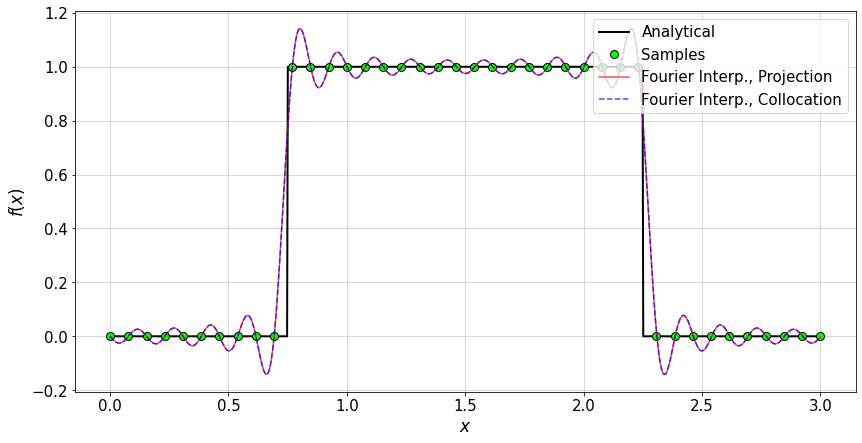

In [426]:
#---- Settings-------
n=40 #number of data samples  
#--------------------

#create data
#x=np.linspace(xRange[0],xRange[1],n)
L=xRange[1]-xRange[0]
x=np.arange(n)*L/n
fx=f(x)

#evaluate the exact function at test points
nTest=1000
xTest=np.linspace(xRange[0],xRange[1],nTest)
fExact=f(xTest)

#Interpolate f(x) by forward DFT using n data samples and then an inverse DFT on xTest
fHat_proj,err_,fFourier_proj=FourierApprox_proj(x,fx,L,xTest,fExact)
fHat_coll,err_,fFourier_coll=FourierApprox_coll(x,fx,xTest,fExact)

#plot Fourier approximation and exact f(x)
plt.figure(figsize=(14,7))
plt.plot(xTest,fExact,'-k',lw=2,mfc='none',label=r'Analytical')
plt.plot(x*L/(x[-1]-x[0]),fx,'ok',ms=8,mfc='lime',label='Samples')
plt.plot(xTest,fFourier_proj,'-r',ms=6,mfc='none',alpha=0.7,label=r'Fourier Interp., Projection')
plt.plot(xTest,fFourier_coll,'--b',ms=6,alpha=0.7,mfc='none',label=r'Fourier Interp., Collocation')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend(loc='upper right')
plt.grid()

Plot the Fourier coefficients. 

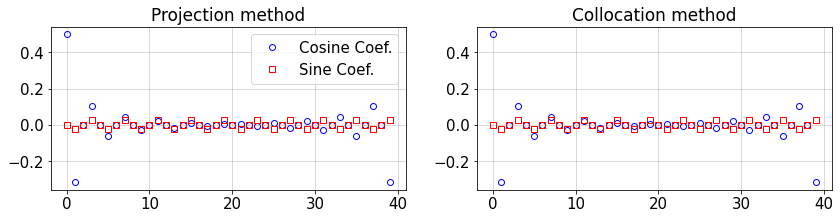

In [427]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
plt.title('Projection method')
plt.plot(fHat_proj.real,'ob',mfc='none',label='Cosine Coef.')
plt.plot(fHat_proj.imag,'sr',mfc='none',label='Sine Coef.')
plt.legend(loc='best')
plt.grid()
plt.subplot(1,2,2)
plt.title('Collocation method')
plt.plot(fHat_coll.real,'ob',mfc='none')
plt.plot(fHat_coll.imag,'sr',mfc='none')
plt.grid()

## Convergence study of the Fourier approximation

Here, for the chosen $f(x)$, we study the convergence of the Fourier approximation of $f(x)$ to the exact value of f(x) (over `xTest`) while changing the number of samples used to construct the Fourier approximation. 

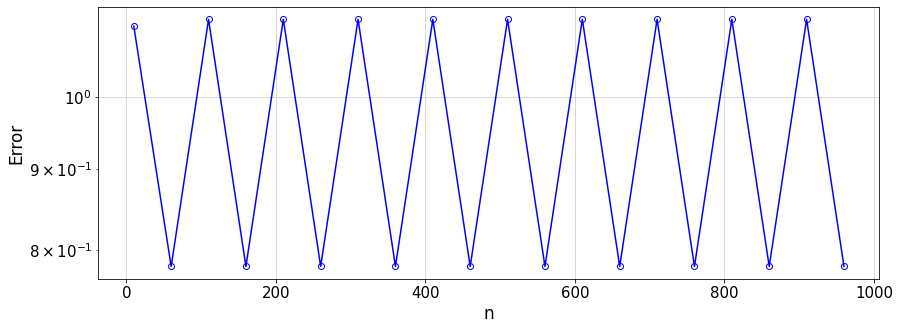

In [428]:
#settings
nMax=2000  #size of xTest
xTest=np.linspace(xRange[0],xRange[1],nMax)
fExact=f(xTest)
L=xRange[1]-xRange[0]

N=[]
err_coll=[]
for n_ in range(10,int(nMax/2),50):
    x=np.linspace(xRange[0],xRange[1]-L/n_,n_)    
    fx=f(x)
    fHat_coll,err_coll_,fFourier_coll=FourierApprox_coll(x,fx,xTest,fExact)    
    N.append(n_)
    err_coll.append(err_coll_)

#plot
plt.figure(figsize=(14,5))
plt.semilogy(N,err_coll,'-ob',mfc='none')
plt.xlabel('n')
plt.ylabel('Error')
plt.grid()

**Discussion**
* What is your conclusion about the convergence rate of the Fourier approximation of different functions (*i.e.* discontinuous, continuous non-smooth, and smooth functions)? 
* How does the choice of norm (*e.g.* infinity vs 2 norm) affect that result?


## FFT using `numpy`
As clear from the Fourier matrix, a DFT cost is of $\mathcal{O}(n^2)$. To reduce the cost to $\mathcal{O}(n\log(n))$ and have a method that scales better at large $n$, the Fast Fourier Transform (FFT) proposed by [Cooley and Tukey](https://www.eit.lth.se/fileadmin/eit/courses/eit085f/Cooley_Tukey_An_Algorithm_for_the_Machine_Calculation_of_Complex_Fourier_Series_Math_of_Comp_1965.pdf) can be used. 

Here, we simply show how to use FFT in `numpy`. 

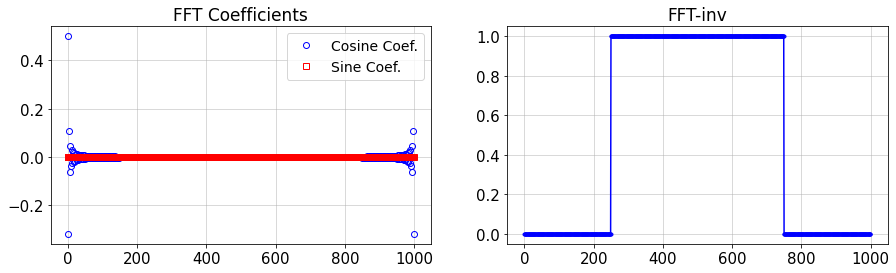

In [436]:
n=1000

#create data
L=xRange[1]-xRange[0]
x=np.linspace(xRange[0],xRange[1]-L/n,n)

plt.figure(figsize=(15,4))
#FFT
fft_=np.fft.fft(f(x))

plt.subplot(1,2,1)
plt.title('FFT Coefficients')
plt.plot(fft_.real/n,'ob',mfc='none',label='Cosine Coef.')
plt.plot(fft_.imag/n,'sr',mfc='none',label='Sine Coef.')
plt.legend(loc='best',fontsize=14)
plt.grid()

#FFT-inv
ifft_=np.fft.ifft(fft_)

plt.subplot(1,2,2)
plt.title('FFT-inv')
plt.plot(ifft_.real,'.-b')
plt.grid()

## Power-spectral density (PSD)
Based on the above Fourier coefficients, we can calculate the power-spectral density (PSD):

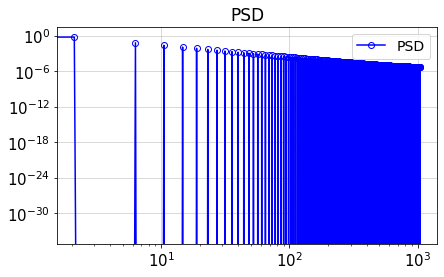

In [437]:
plt.figure(figsize=(15,4))
#FFT
fft_=np.fft.fft(f(x))

L=x[n-1]-x[0]+x[1]
alpha = 2*pi/L

psd = abs(fft_[0:int(n/2)+1])**2/n/n*2*L
psd[0]/=2
psd[int(n/2)]/=2

k=np.arange(0,int(n/2)+1)*alpha

plt.subplot(1,2,1)
plt.title('PSD')
plt.loglog(k,psd,'ob-',mfc='none',label='PSD')
plt.legend(loc='best',fontsize=14)
plt.grid()

Different ways of calculating the energy in the domain: i) in physical space, ii) using Parseval's theorem, iii) integral of the PSD 

In [438]:
sum((f(x))**2)*(x[1]-x[0])

1.5

In [439]:
sum(abs(fft_)**2)/n**2*L

1.4999999999999991

In [440]:
sum(psd)

1.4999999999999998

## Spectral Derivatives

Consider the inverse Fourier transform $f(x) = \sum_{k} \hat{f}_k \Phi_k(x) \,,$ where the Fourier bases are $\Phi_k(x)=e^{i\alpha k x}$.
Any differentiation of $f(x)$ with respect to $x$ corresponds to the same-order derivative of $\Phi_k(x)$.

For instance, 

$$
f'(x)={\rm d}f/{\rm d}x = \sum_{k} i\alpha \hat{f}_k \Phi_k(x) \,.
$$

In the following example, we compare the convergence rate of the first derivative of a given f(x) computed by the FFT and 1st- and 2nd-order finite-difference methods.

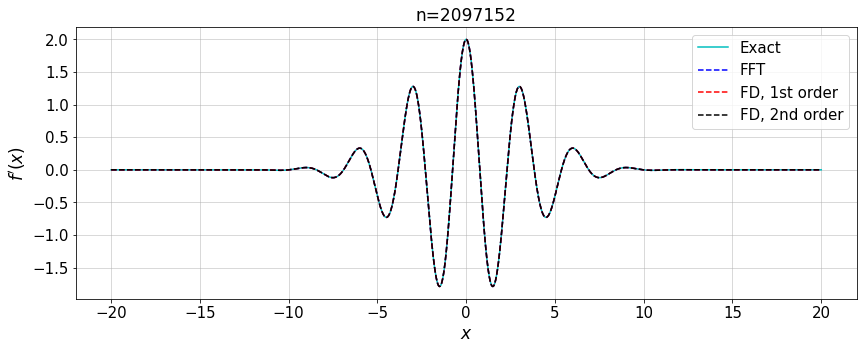

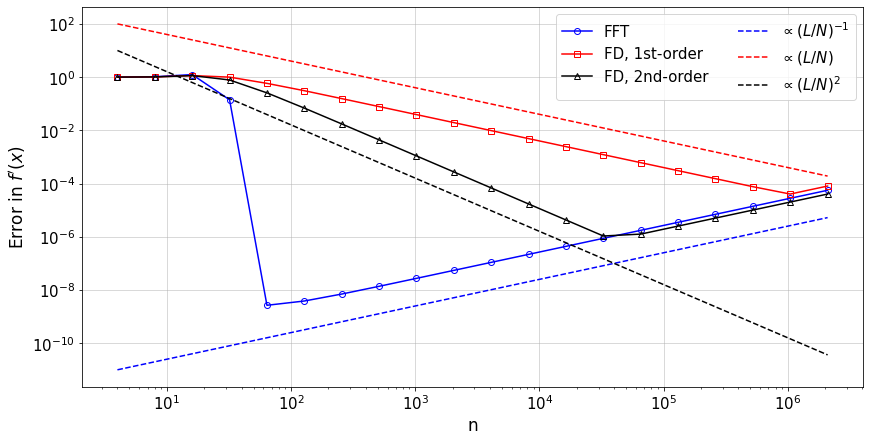

In [441]:
##Analytical f(x) and f'(x)
f = lambda x: np.sin(2*x)*np.exp(-x**2/20)
fp = lambda x: 2*np.cos(2*x)*np.exp(-x**2/20)-(2/20)*x*f(x)

#
err_Fou=[]
err_FD1=[]
err_FD2=[]
N=[]

L=40
#
for i in range(2,22):
    n=int(2**i)
    
    #create data
    dx=L/n    
    x=np.linspace(-L/2,L/2-dx,n)    
    fx=f(x)
    fpx=fp(x)
    
    xj=2.*pi*np.arange(n)/n
    
    #FFT of f(x)
    fHat=np.fft.fft(fx)
    
    #FFT-inv of f'(x)    
    #k=np.fft.fftfreq(fHat.size)*n*2*pi/L     
    #another implementation
    k=np.arange(-n/2,n/2)*2*pi/L
    k=np.fft.fftshift(k)
    fpFourier=np.fft.ifft(1j*k*fHat).real
        
    #FD derrivative
    fpFD1=np.zeros(n)
    fpFD2=np.zeros(n)
    for i in range(n):
        ic=i+1
        im=i-1
        if i==0:
           im=n-1
        if i==n-1:
           ic=0        
        fpFD1[i]=(fx[i]-fx[im])/dx
        fpFD2[i]=(fx[ic]-fx[im])/(2*dx)        
        
    #compute norm of error in computed f'
    err_Fou.append(norm(fpFourier-fpx,np.inf)/norm(fpx,np.inf))
    err_FD1.append(norm(fpFD1-fpx,np.inf)/norm(fpx,np.inf))        
    err_FD2.append(norm(fpFD2-fpx,np.inf)/norm(fpx,np.inf))        
    N.append(n)  

#plot    
plt.figure(figsize=(14,5))
plt.title('n='+str(N[-1]))
plt.plot(x,fpx,'-c',label='Exact')
plt.plot(x,fpFourier,'--b',label='FFT')
plt.plot(x,fpFD1,'--r',label='FD, 1st order')
plt.plot(x,fpFD2,'--k',label='FD, 2nd order')
plt.xlabel(r'$x$')
plt.ylabel(r'$f^\prime(x)$')
plt.grid()
plt.legend(loc='upper right')
        
#
plt.figure(figsize=(14,7))
N=np.asarray(N)
plt.loglog(N,err_Fou,'-ob',mfc='none',label='FFT')
plt.plot(N,err_FD1,'-sr',mfc='none',label='FD, 1st-order')
plt.plot(N,err_FD2,'-^k',mfc='none',label='FD, 2nd-order')
plt.plot(N,1e-10/(L/N)**1,'--b',label='$\propto(L/N)^{-1}$')
plt.plot(N,10*L/N,'--r',label='$\propto(L/N)$')
plt.plot(N,0.1*(L/N)**2,'--k',label='$\propto(L/N)^2$')
plt.legend(loc='upper right',ncol=2)
plt.grid()
plt.xlabel('n')
plt.ylabel('Error in $f^\prime(x)$')
plt.show()

### Discussion
In the notebook {ref}`prel_nb` and the discussion in Section {ref}`float`, we saw the different sources of errors in the computation of the derivative; here we see the same behaviour again (note the use of an $\infty$-norm though). It is interesting to see that the same issue is also present for the Fourier-based derivative, where the optimal $\Delta x$ is reached at a much smaller value.


In the notebook {ref}`wavenumbers`, we discussed the problem of **oddball mode** when computing the derivative of $f(x)$ using its Fourier transform. 

However, here for the considered analytical function the removal of the oddball mode is not applied. Why? (Hint, look at the Fourier coefficients.)

## Aliasing

Let's look at the coefficients in the DFT. We repeat one of the above Fourier transforms and plot $\mathbf{a}$ and $\mathbf{b}$ which are respectively the Cosine and Sine coefficients in Fourier transform.

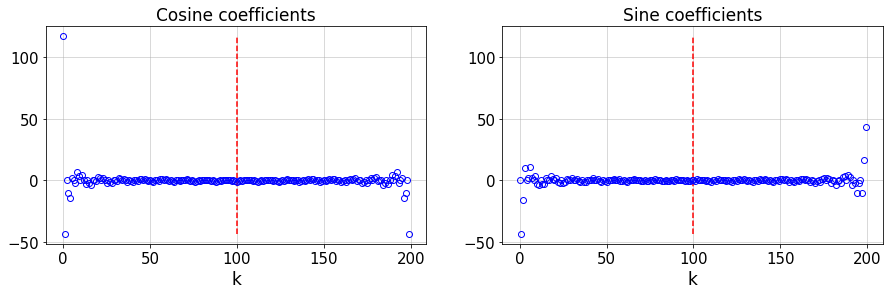

In [442]:
#define f(x)
f = lambda x: np.heaviside(x-0.25,1.)-np.heaviside(x-2.0,1)  #non-smooth function

#settings
xRange=[0,3]
n=200    # number of data samples
dx=(xRange[1]-xRange[0])/n
#create data
x=np.linspace(xRange[0],xRange[1]-dx,n)
fx=f(x)

#FFT
fHat=np.fft.fft(f(x))
a_col=fHat.real
b_col=fHat.imag

#plot
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Cosine coefficients')
plt.plot(a_col,'ob',mfc='none')
plt.vlines(int(n/2),np.min(a_col),np.max(a_col),colors='r', linestyles='dashed')
plt.xlabel('k')
plt.grid()
plt.subplot(1,2,2)
plt.title('Sine coefficients')
plt.plot(b_col,'ob',mfc='none')
plt.vlines(int(n/2),np.min(a_col),np.max(a_col),colors='r', linestyles='dashed')
plt.xlabel('k')
plt.grid()

Because the original signal is real, there is an **even symmetry** in the DFT coefficients, i.e.,

$$
\hat{f}_k = \hat{f}^*_{-k} \,,
$$ 

where $^*$ denotes complex conjugate. For any mode, this symmetry can be observed (up to the considered precision):

In [443]:
I=15  #index of a Fourier mode < n-1
print('Cosine coefficients: ',a_col[I],a_col[n-I])
print('Sine coefficients  : ',b_col[I],b_col[n-I])

Cosine coefficients:  -1.9671802918566499 -1.9671802918566477
Sine coefficients  :  1.9671802918566528 -1.9671802918566486


Another symmetry is the consequence of the **periodicity** assumed in physical space. This can be easily shown using the definition of the Fourier transform:

$$
\hat{f}_k = \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-i k  x_j} \,,\quad \text{where}\quad x_j=\frac{2\pi j}{N} \,,\quad k=0,1,\ldots,N-1
$$

Let's compute the Fourier coefficient associated to a mode with distance $m\, N$ from $k$, where $m\in \mathbb{Z}$:

$$
\begin{align}
\hat{f}_{k-m\,N} &= \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-i (k-m\,N)  x_j} \\
&=  \frac{1}{N} \sum_{j=0}^{N-1} f_j e^{-i k  x_j} e^{i 2\pi m\,j} \\
&=\hat{f}_{k}
\end{align}
$$

Therefore, shifting a mode by $\pm mN$ in the spectral space would not change the Fourier coefficient. 


Similarly, it can be shown that as a result of a shift by $N/m$ where $m\in \mathbb{Z}-\{0\}$, the Fourier coefficient $\hat{f}_{k-N/m}$ are mapped to some $\hat{f}_{k}$.
This behavior is called **aliasing** referring to the fact that the highest mode that can be represented by $N$ discrete function values $f_i$, where $i=1,\cdots,N$, is $K=N/2$. For mode $k>K$, the Fourier coefficients $\hat{f}_k$ are mapped to the representable region $|k|\leq K$. 

This is closely connected to what is called **Nyquist-Shannon sampling theorem** which states that at least two samples per lowest period (or highest mode in spectral domain) are required to completely capture the structure of a function (or, a signal in time-frequency domains).

Therefore, any sampling rate below the specified criterion will lead to misrepresentation of the actual function. 
For instance, look at the following plot where the rate of sampling is not as high as two samples per period. The represented function looks completely different from the actual function, although the samples represent the true values. 

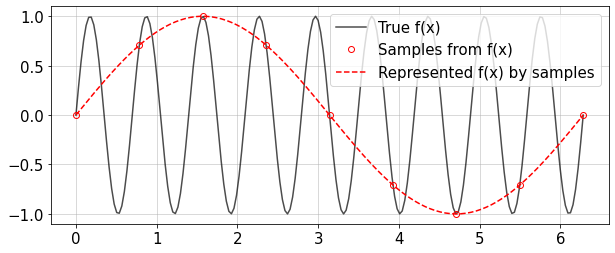

In [444]:
plt.figure(figsize=(10,4))
xTest=np.linspace(0,2*pi,200)
plt.plot(xTest,np.sin(9*xTest),'-k',alpha=0.7,label='True f(x)')
xc=np.linspace(0,2*pi,2*4+1)
plt.plot(xc,np.sin(xc),'or',label='Samples from f(x)')
plt.plot(xTest,np.sin(1.*xTest),'--r',label='Represented f(x) by samples')
plt.legend(loc='best',fontsize=15)
plt.grid()

In this case, $N=8$, the black line has wavenumber $k_0=9$, and the red one $k_1=9-N=1$.

**Discussion**
1. How should we deal with the aliasing issue in the computational codes which are based on the Fourier transform?